<a href="https://colab.research.google.com/github/Ruvini-Jayakody/phone-company/blob/main/HRAnalytics(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Discover the factors affecting to underperformance of the employees**

 **Project Description**

In today’s organizational landscape, many white-collar employees fail to meet expected performance levels despite being carefully recruited. This underperformance can impact productivity, resource planning, and overall business outcomes. Unlike traditional performance evaluation systems, which often rely on subjective judgment, this model takes a data-driven approach to analyze and understand the root causes of reduced employee performance.

 **Purpose**

To identify the key HR-related factors that contribute to reduced performance among white-collar employees by understanding the. Instead of predicting outcomes, the model focuses on uncovering the underlying causes of underperformance using machine learning, enabling organizations to make informed, data-driven decisions for employee development and workforce optimization.









In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot
from warnings import filterwarnings

filterwarnings("ignore")

In [ ]:
import pandas as pd

In [ ]:
!ls


sample_data


In [ ]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition (1).csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
df.shape

(1470, 35)

In [ ]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [ ]:
df.tail(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df1 = df.select_dtypes('object')
df1

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [ ]:
df2 = df.select_dtypes('int64')
df2

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
df1.describe().T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [ ]:
df.describe(include='int64').T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [ ]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [ ]:
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

np.False_

There are no missing values or duplicates in the dataset.

The following columns can be dropped as they don't impact the analysis:

Over18: All values are "Y"

EmployeeCount: All values are 1

StandardHours: All values are 80

EmployeeNumber: Just an ID, not useful for analysis

In [ ]:
df = df.drop(['Over18', 'EmployeeNumber','EmployeeCount','StandardHours'],axis=1)

# **Discovering Relationships in Data**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition (1).csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
# to separate categorical and numerical columns
cat = df.select_dtypes(['object']).columns
num = df.select_dtypes(['number']).columns
print(cat)
print(num)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [ ]:
for i in cat:
    count = df.groupby(i).size()
    print(count)

Attrition
No     1233
Yes     237
dtype: int64
BusinessTravel
Non-Travel            150
Travel_Frequently     277
Travel_Rarely        1043
dtype: int64
Department
Human Resources            63
Research & Development    961
Sales                     446
dtype: int64
EducationField
Human Resources      27
Life Sciences       606
Marketing           159
Medical             464
Other                82
Technical Degree    132
dtype: int64
Gender
Female    588
Male      882
dtype: int64
JobRole
Healthcare Representative    131
Human Resources               52
Laboratory Technician        259
Manager                      102
Manufacturing Director       145
Research Director             80
Research Scientist           292
Sales Executive              326
Sales Representative          83
dtype: int64
MaritalStatus
Divorced    327
Married     673
Single      470
dtype: int64
Over18
Y    1470
dtype: int64
OverTime
No     1054
Yes     416
dtype: int64


In [ ]:
for i in num:
    count = df.groupby(i).size()
    print(count)

Age
18     8
19     9
20    11
21    13
22    16
23    14
24    26
25    26
26    39
27    48
28    48
29    68
30    60
31    69
32    61
33    58
34    77
35    78
36    69
37    50
38    58
39    42
40    57
41    40
42    46
43    32
44    33
45    41
46    33
47    24
48    19
49    24
50    30
51    19
52    18
53    19
54    18
55    22
56    14
57     4
58    14
59    10
60     5
dtype: int64
DailyRate
102     1
103     1
104     1
105     1
106     1
       ..
1492    1
1495    3
1496    2
1498    1
1499    1
Length: 886, dtype: int64
DistanceFromHome
1     208
2     211
3      84
4      64
5      65
6      59
7      84
8      80
9      85
10     86
11     29
12     20
13     19
14     21
15     26
16     32
17     20
18     26
19     22
20     25
21     18
22     19
23     27
24     28
25     25
26     25
27     12
28     23
29     27
dtype: int64
Education
1    170
2    282
3    572
4    398
5     48
dtype: int64
EmployeeCount
1    1470
dtype: int64
EmployeeNumber
1       1


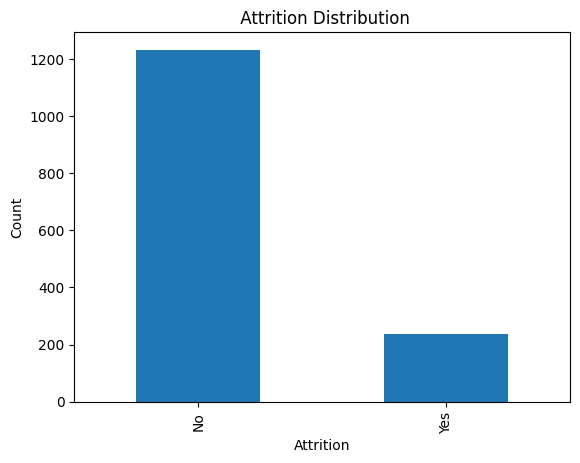

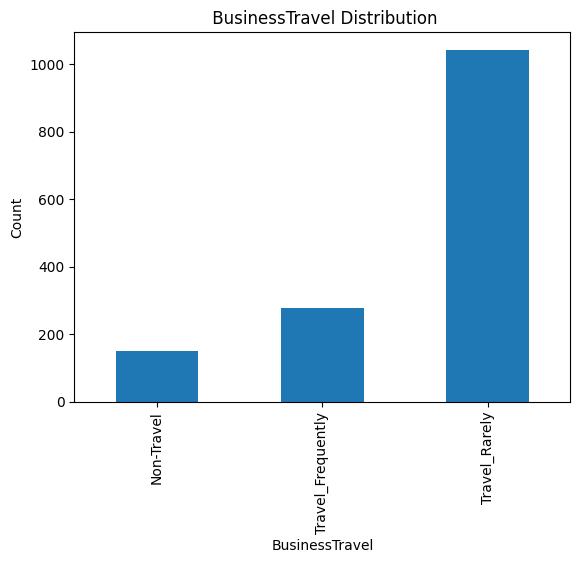

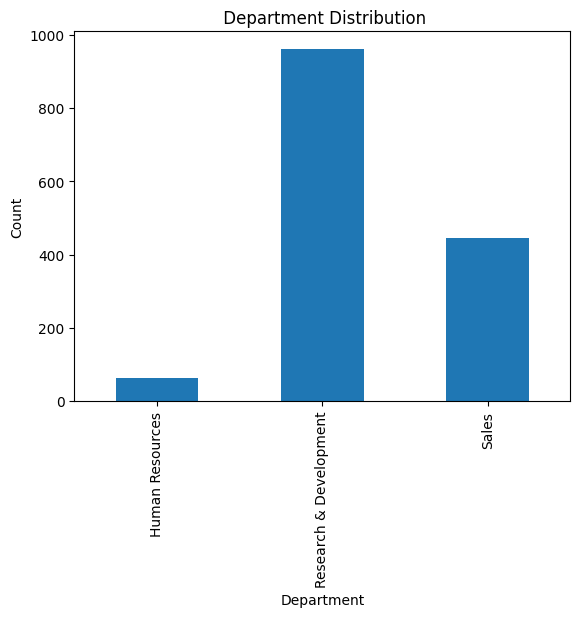

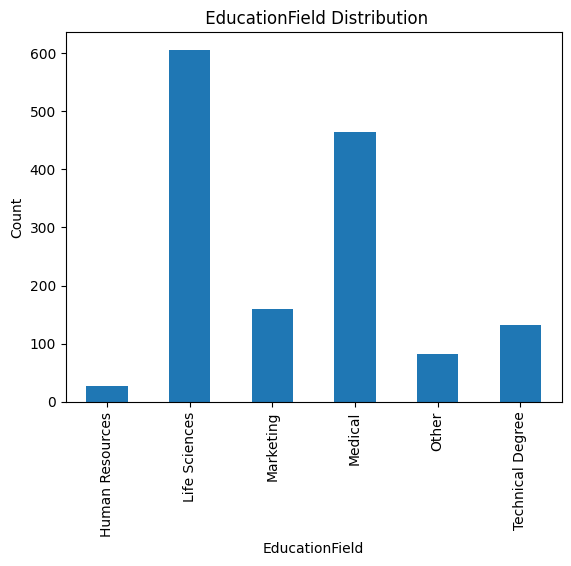

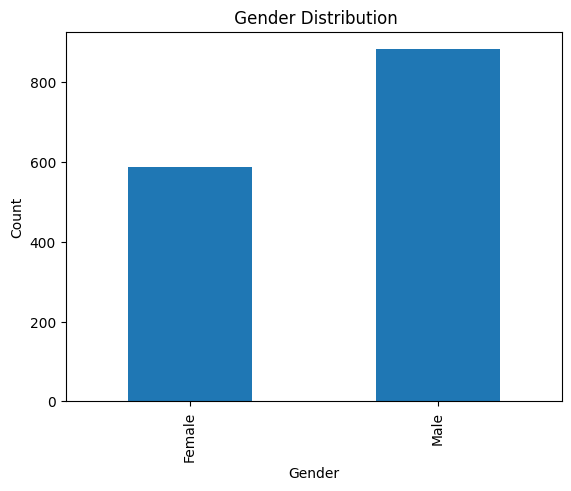

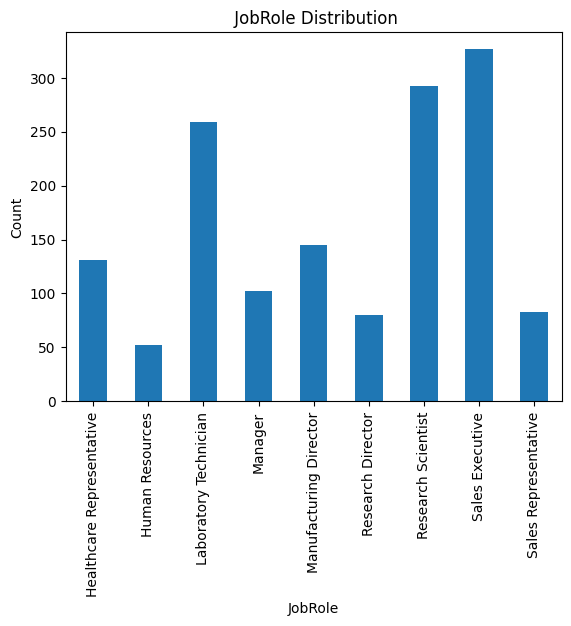

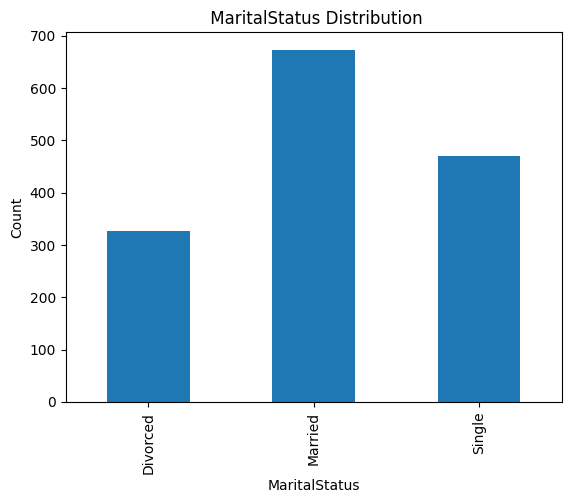

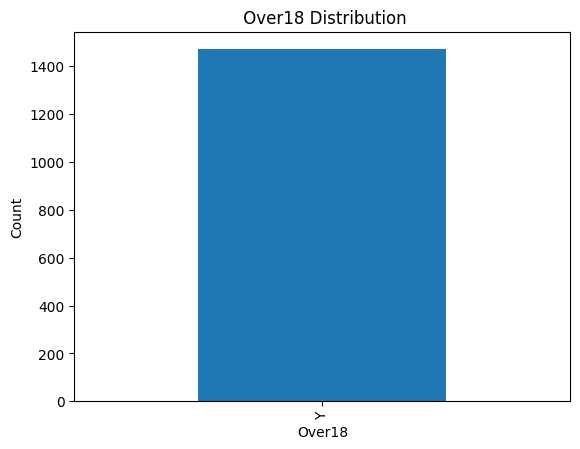

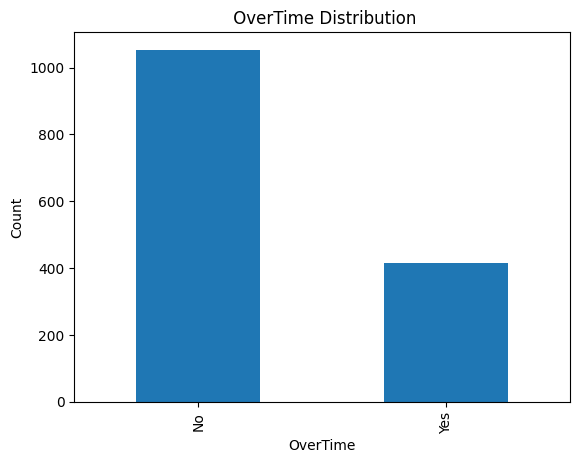

In [ ]:
import matplotlib.pyplot as plt

for i in cat:
  counts = df.groupby(i).size()
  counts.plot(kind='bar')
  plt.xlabel(i)
  plt.ylabel('Count')
  plt.title( f" {i} Distribution")
  plt.show()

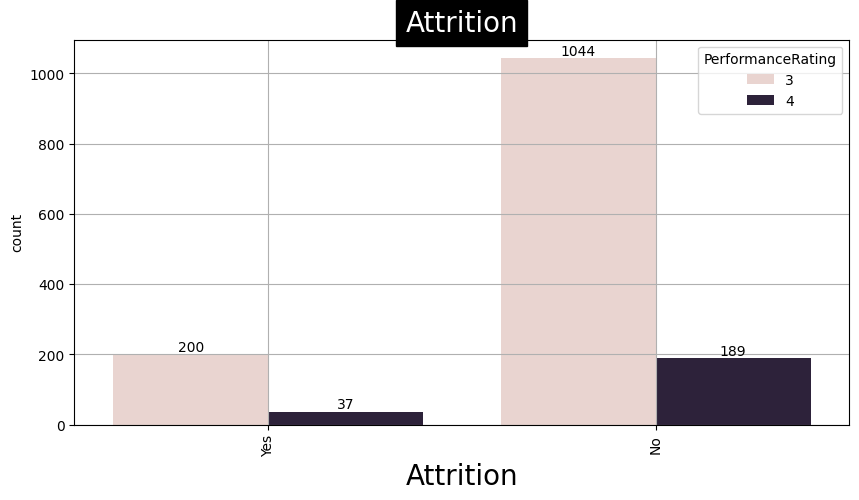

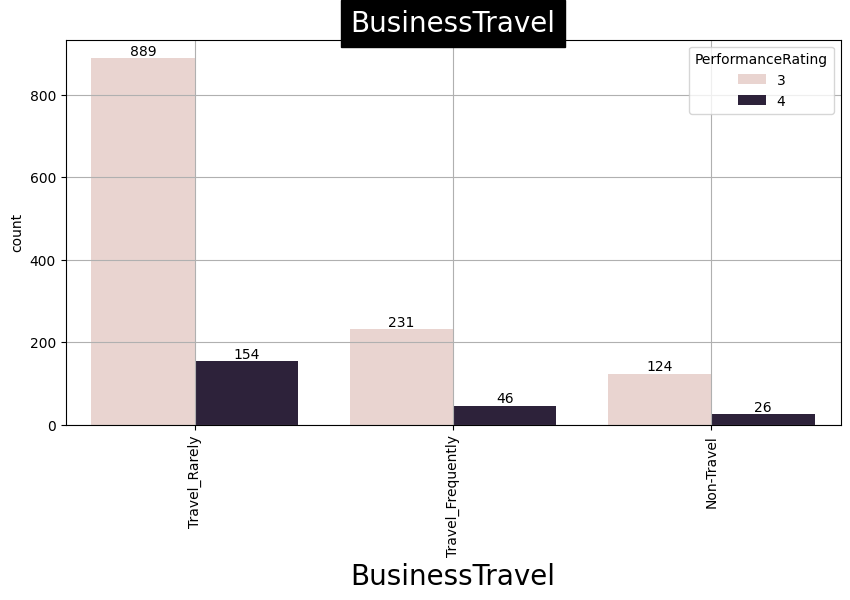

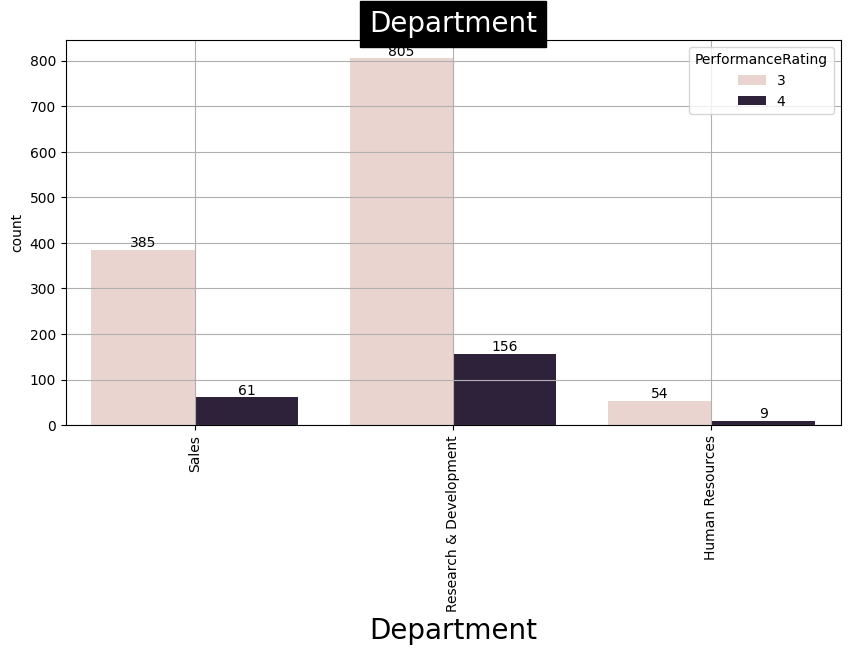

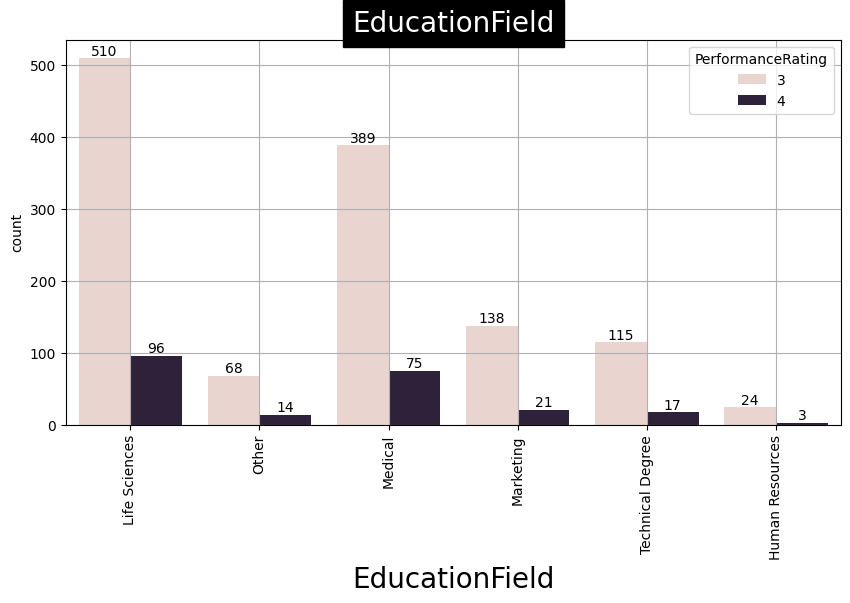

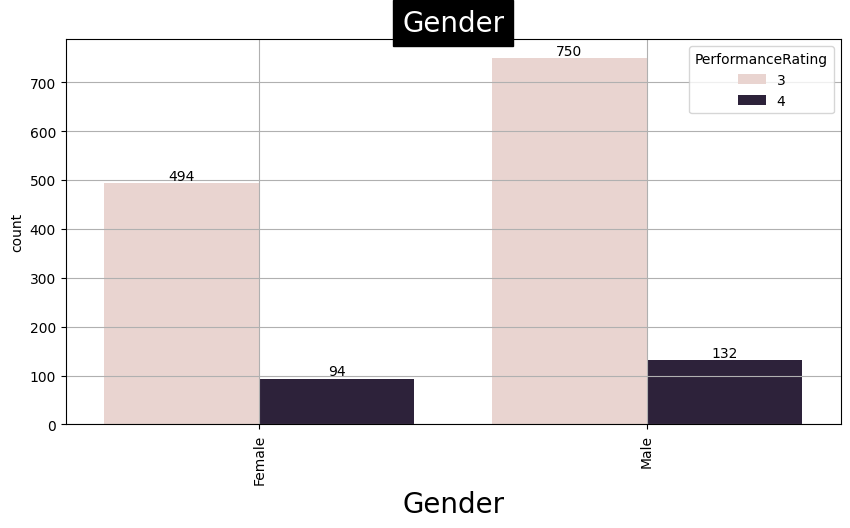

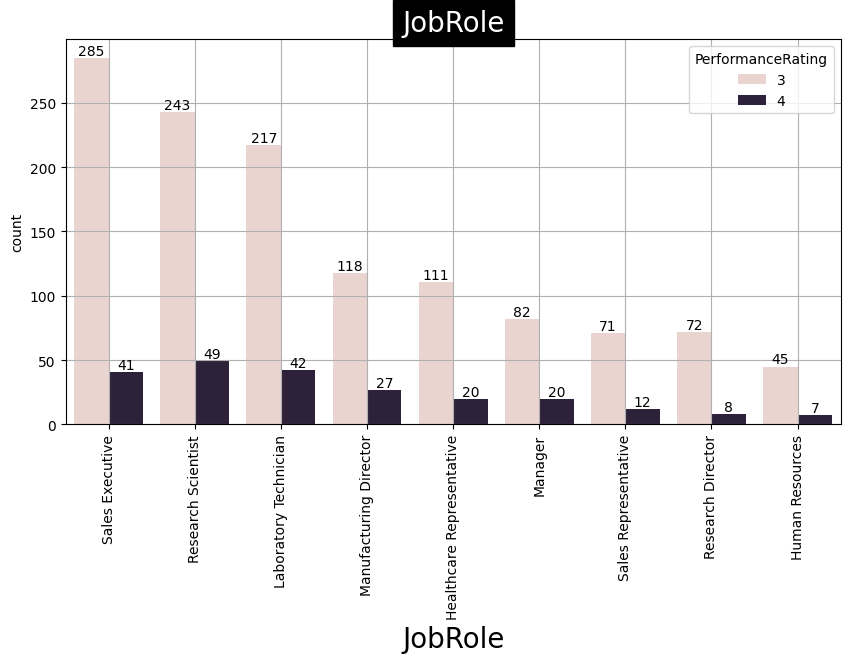

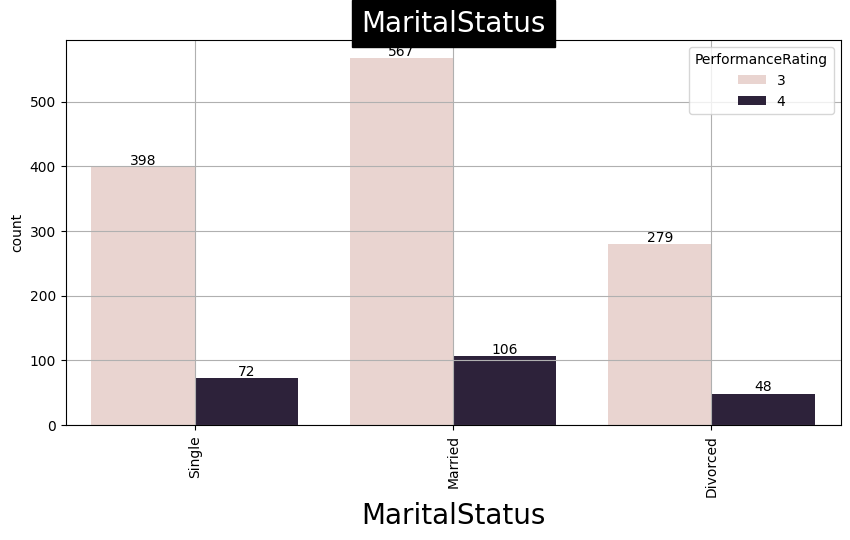

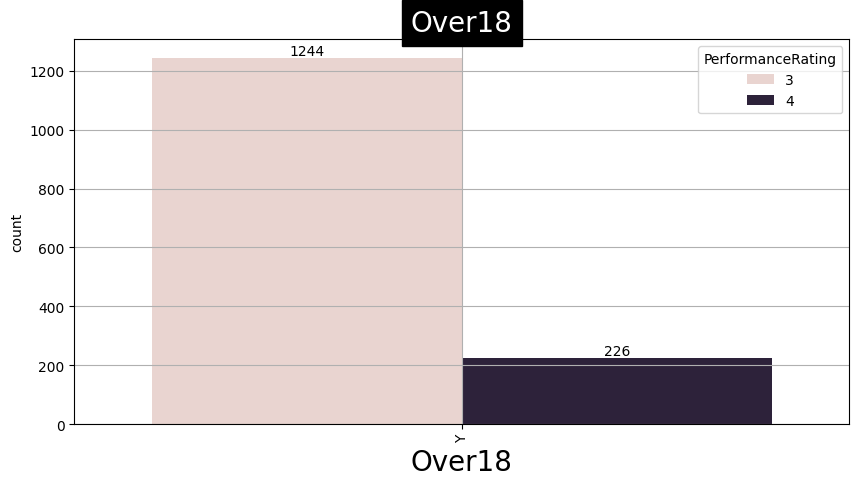

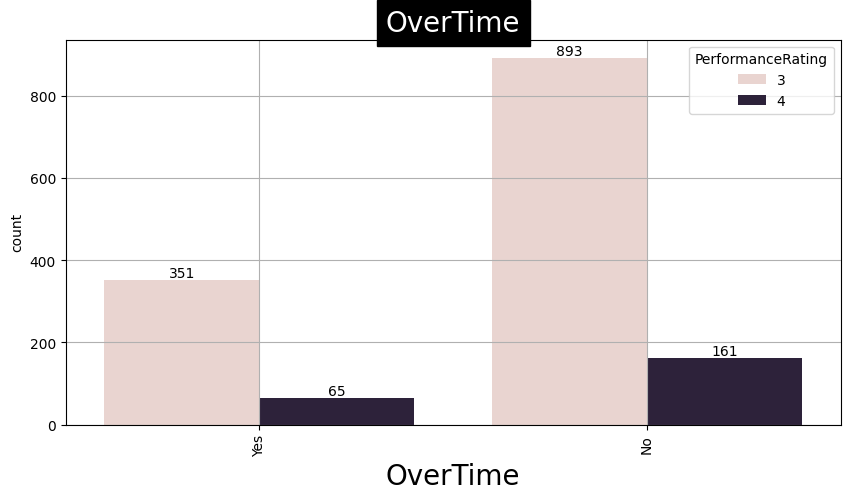

In [ ]:
import seaborn as sns # Importing the seaborn library
import matplotlib.pyplot as plt

for column in cat :
    plt.figure(figsize=(10,5))

    ax=sns.countplot(x=df[column], data=df,hue="PerformanceRating") # Now sns is defined and can be used
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(column,backgroundcolor='black',color='white',fontsize=20)
    plt.xticks(rotation=90)
    plt.xlabel(column,fontsize=20)
    plt.grid()
    plt.show()

In [ ]:
numerical_cols = df.select_dtypes(include=['number'])

mean_values = numerical_cols.mean()
median_values = numerical_cols.median()
std_dev_values = numerical_cols.std()

print("Mean:\n", mean_values)
print("\nMedian:\n", median_values)
print("\nStandard Deviation:\n", std_dev_values)

Mean:
 Age                            36.923810
DailyRate                     802.485714
DistanceFromHome                9.192517
Education                       2.912925
EnvironmentSatisfaction         2.721769
HourlyRate                     65.891156
JobInvolvement                  2.729932
JobLevel                        2.063946
JobSatisfaction                 2.728571
MonthlyIncome                6502.931293
MonthlyRate                 14313.103401
NumCompaniesWorked              2.693197
PercentSalaryHike              15.209524
PerformanceRating               3.153741
RelationshipSatisfaction        2.712245
StockOptionLevel                0.793878
TotalWorkingYears              11.279592
TrainingTimesLastYear           2.799320
WorkLifeBalance                 2.761224
YearsAtCompany                  7.008163
YearsInCurrentRole              4.229252
YearsSinceLastPromotion         2.187755
YearsWithCurrManager            4.123129
dtype: float64

Median:
 Age                      

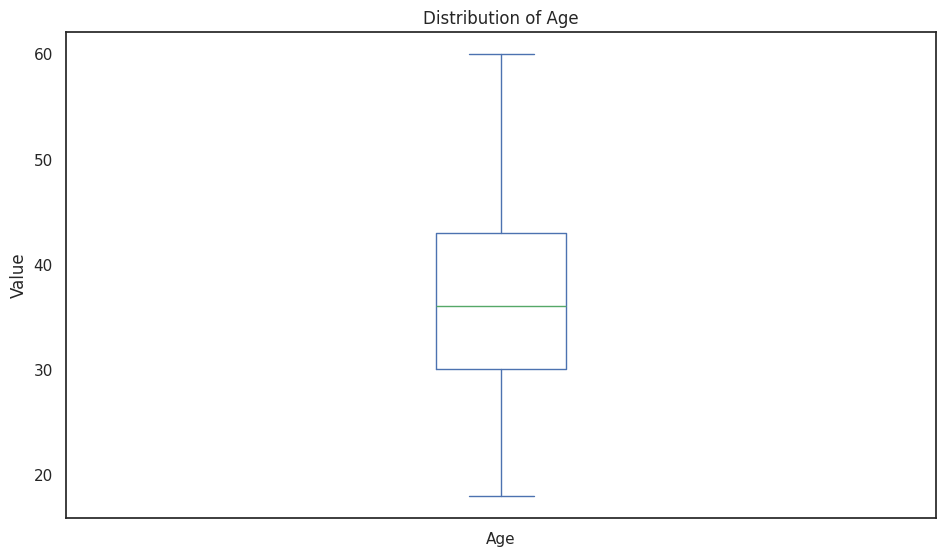

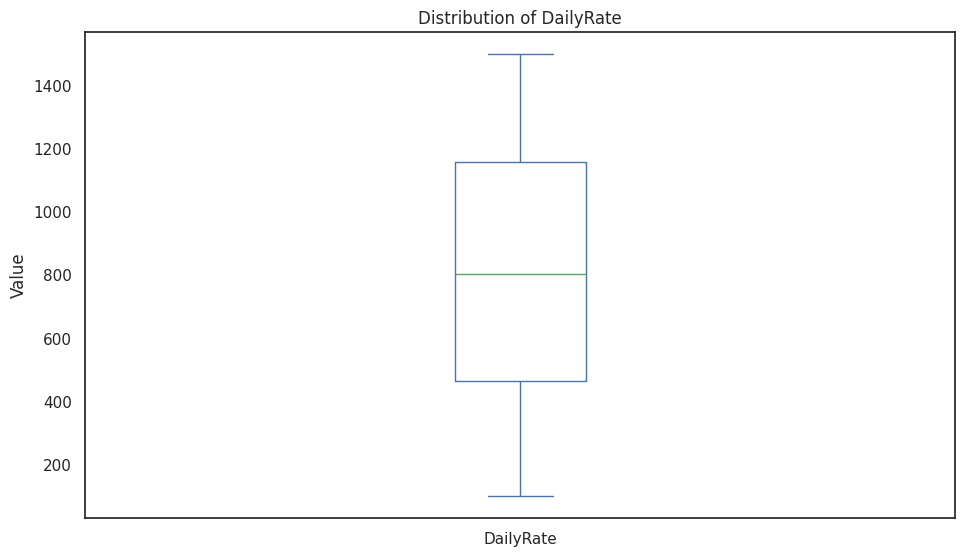

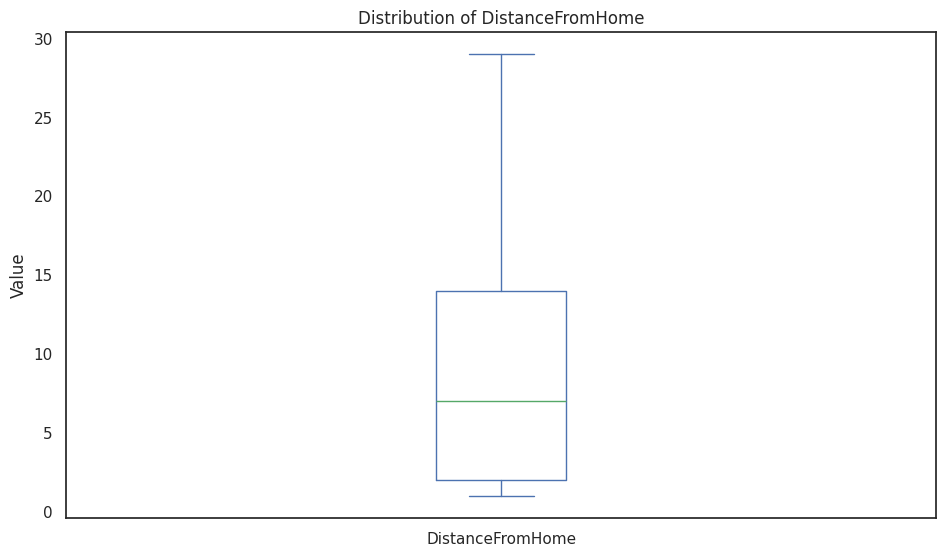

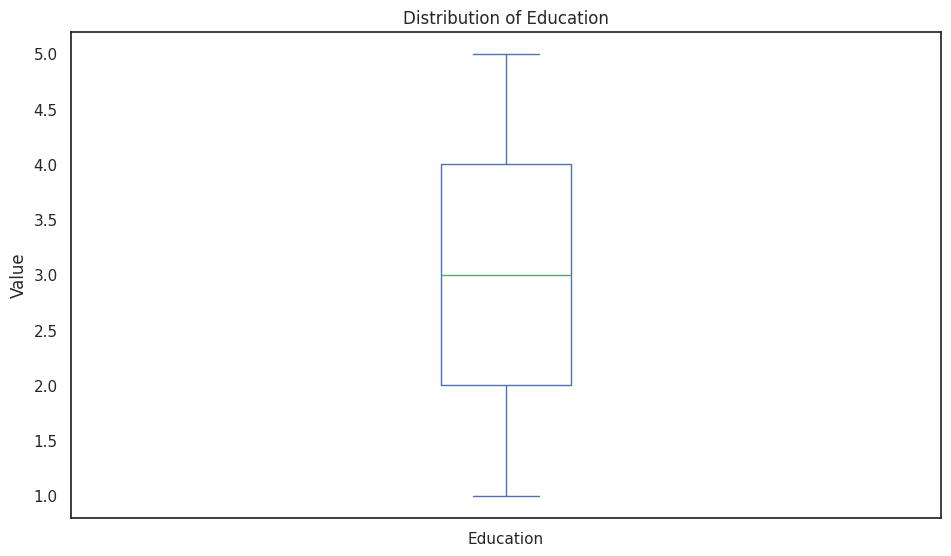

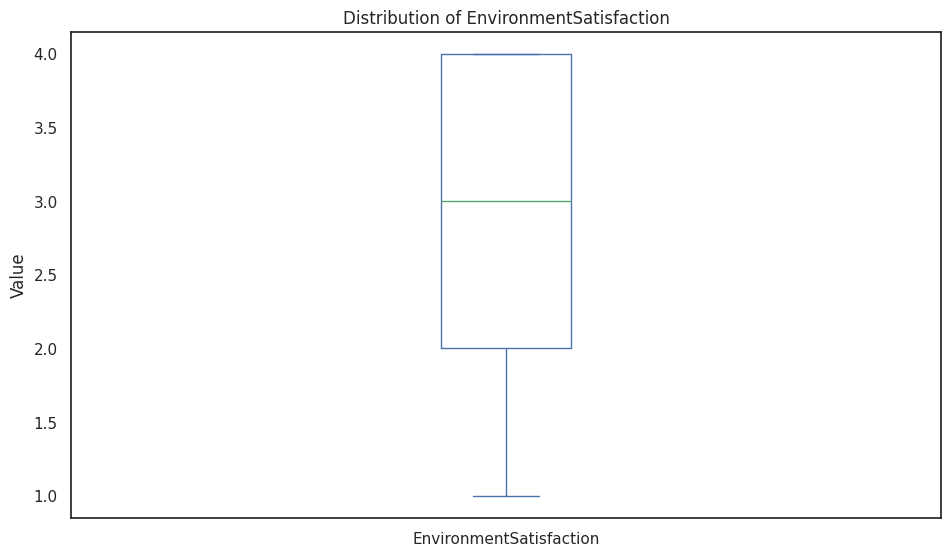

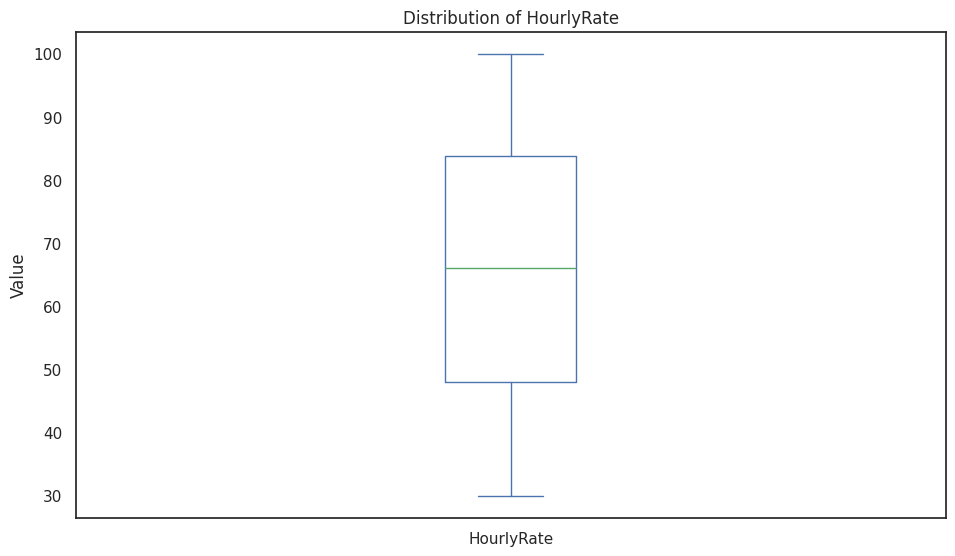

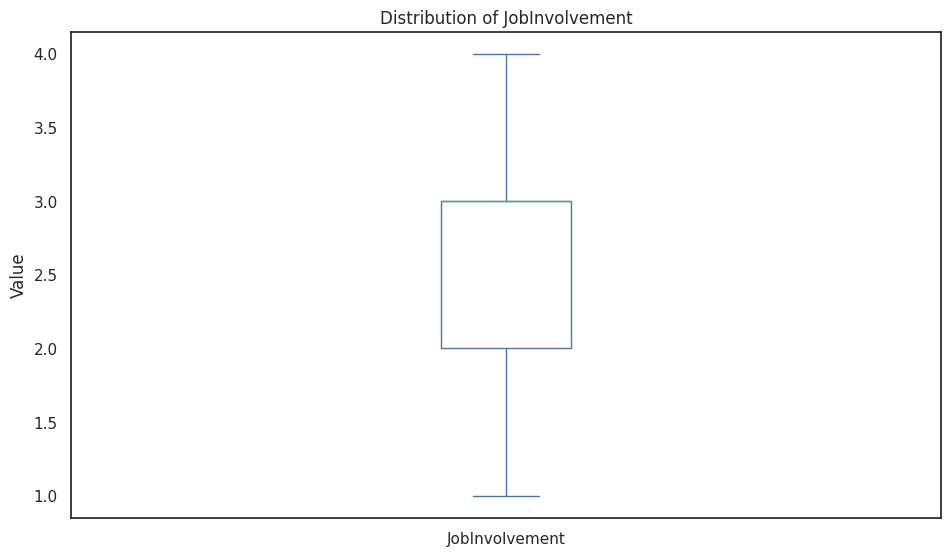

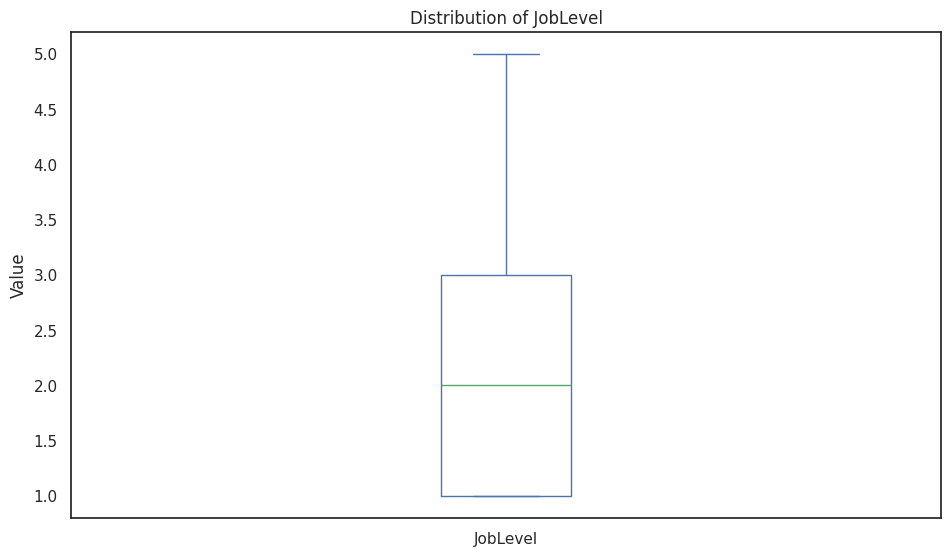

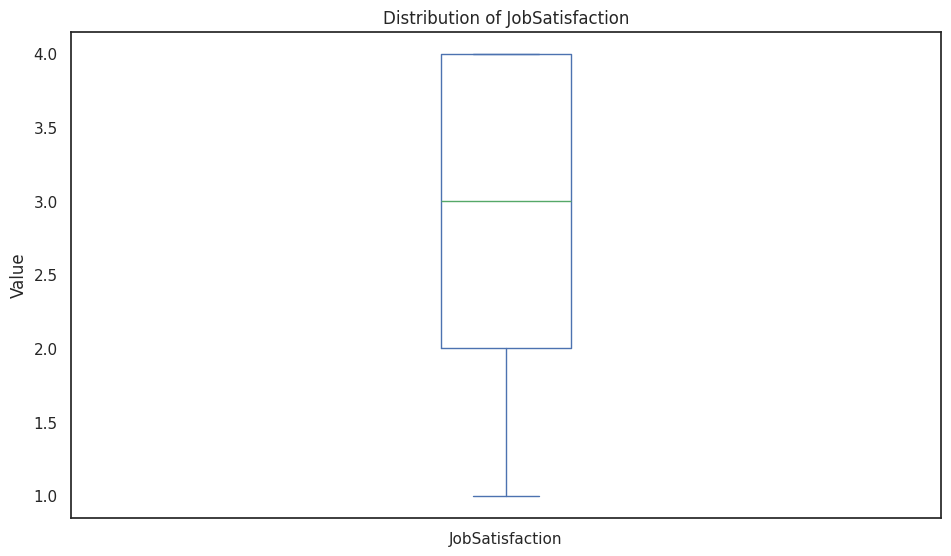

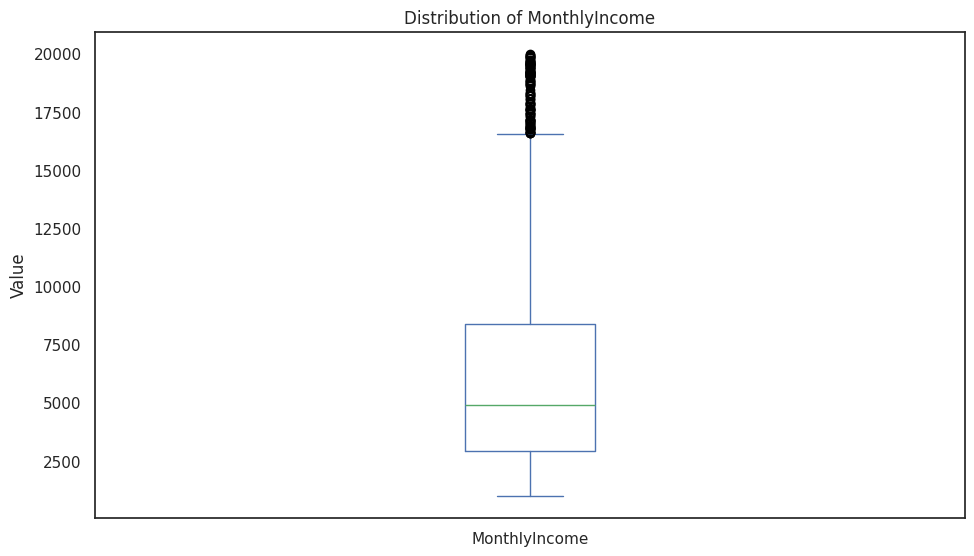

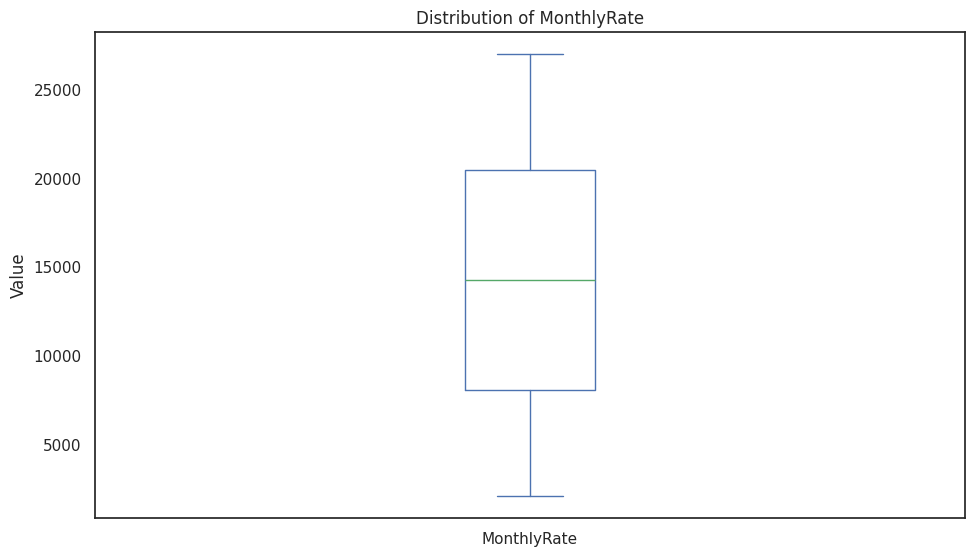

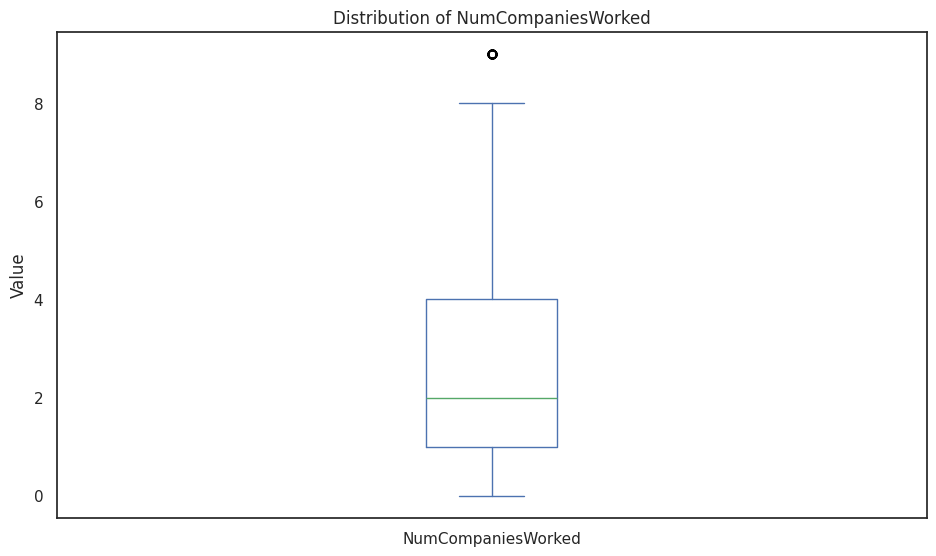

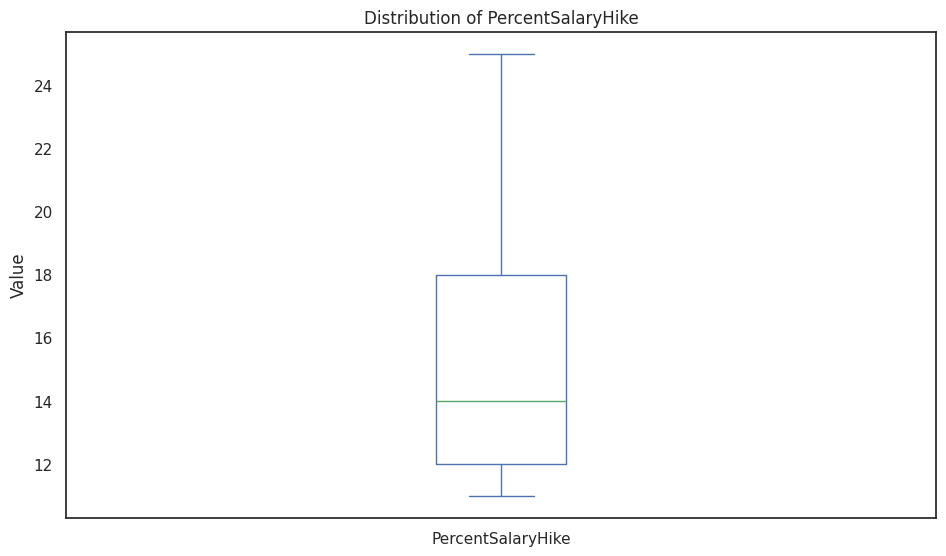

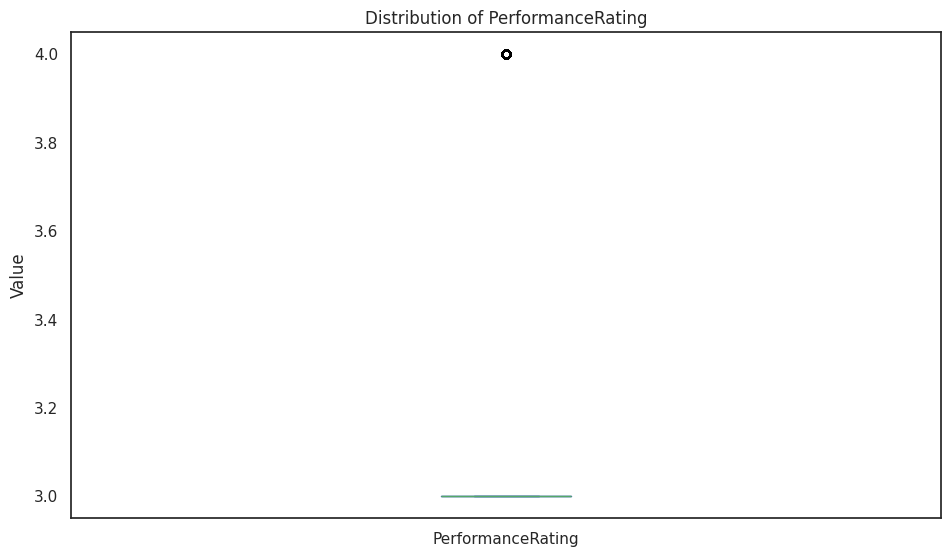

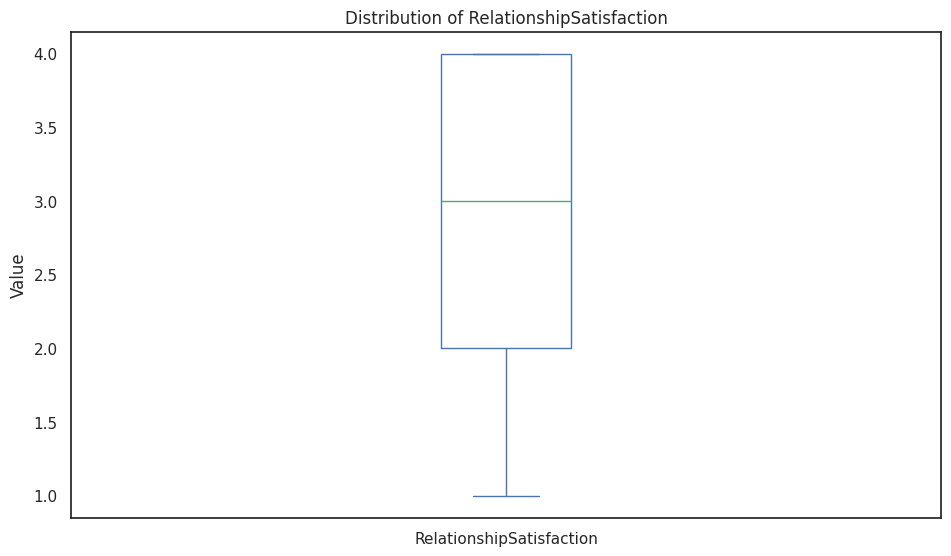

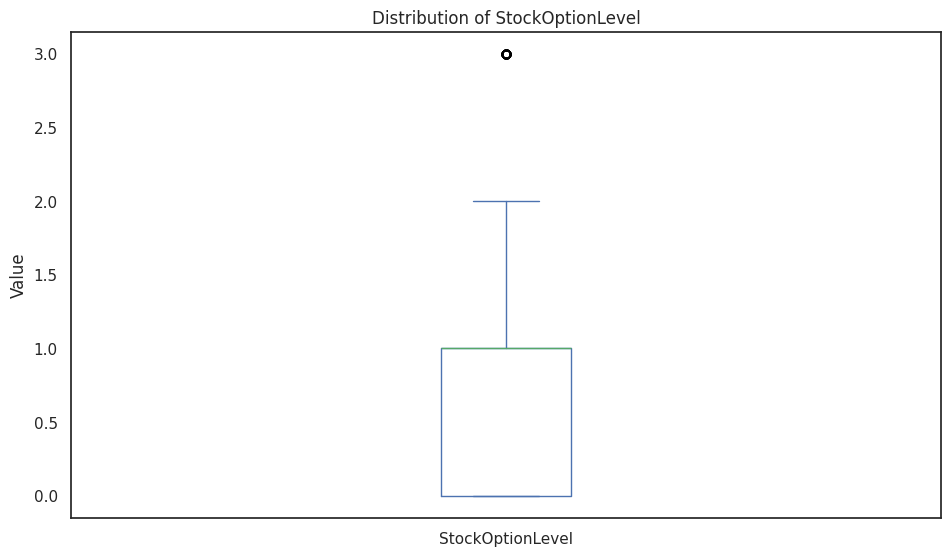

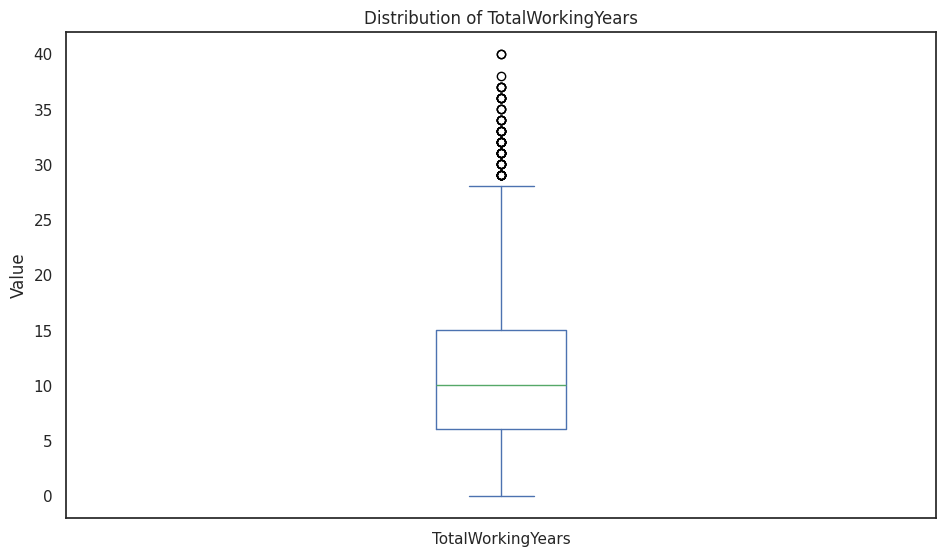

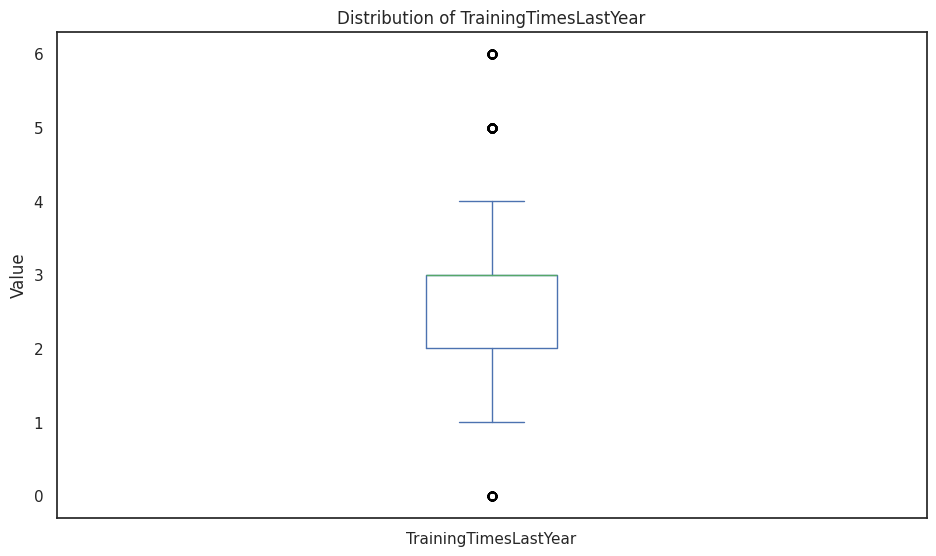

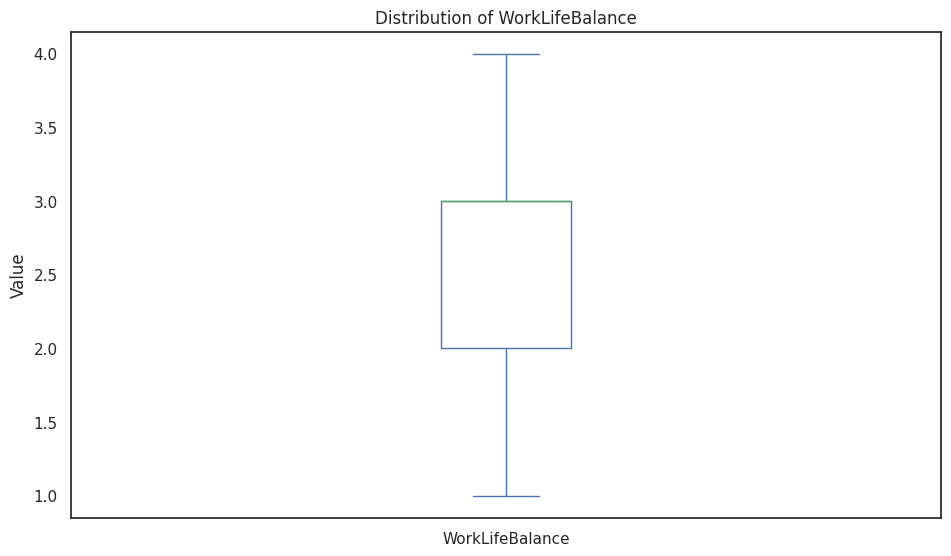

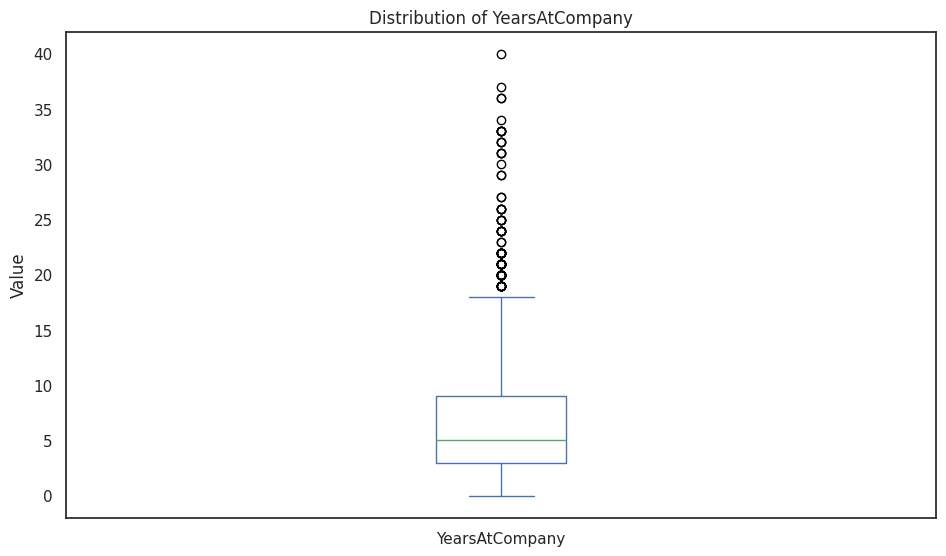

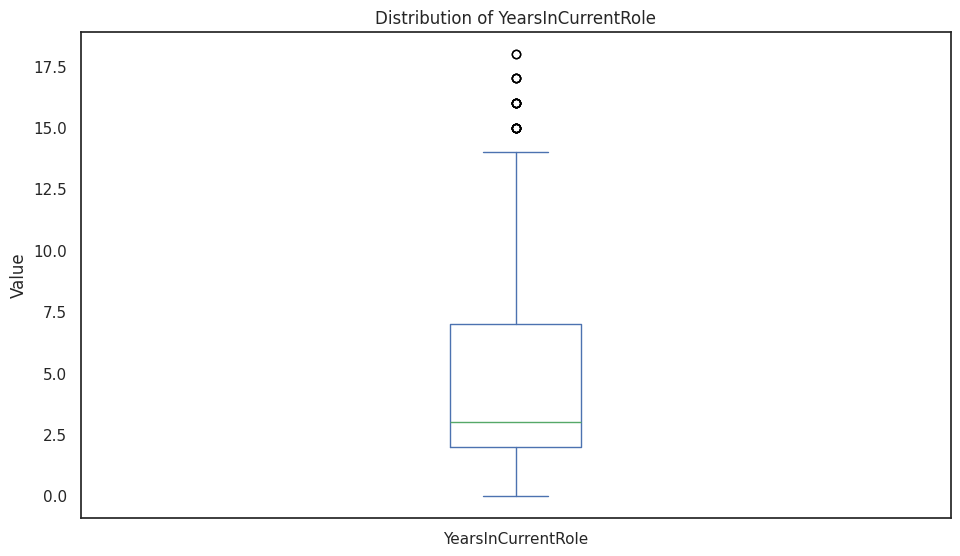

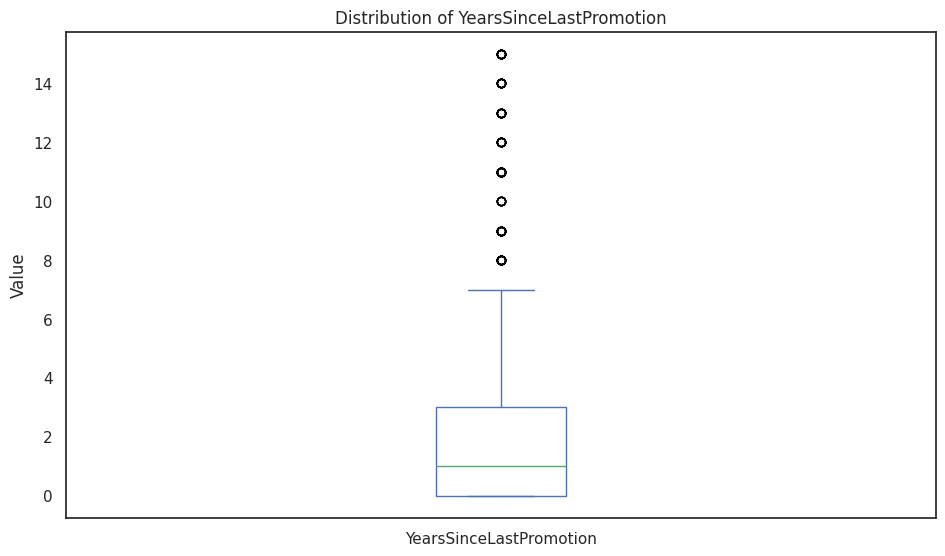

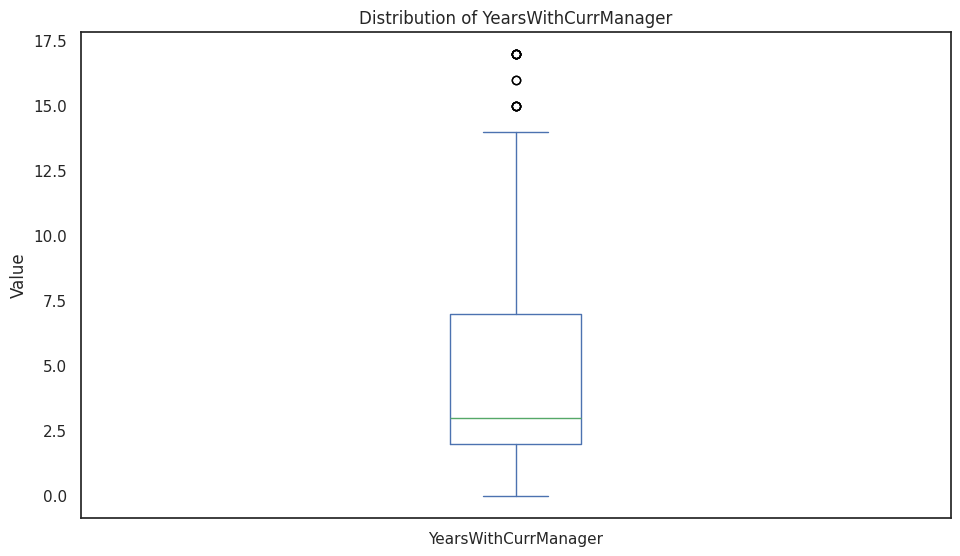

In [ ]:
numerical_cols = df.select_dtypes(include=['number'])

for column in numerical_cols.columns:
  df[column].plot(kind='box', figsize=(10, 6))
  plt.title('Distribution of ' + column)
  plt.ylabel('Value')
  plt.show()

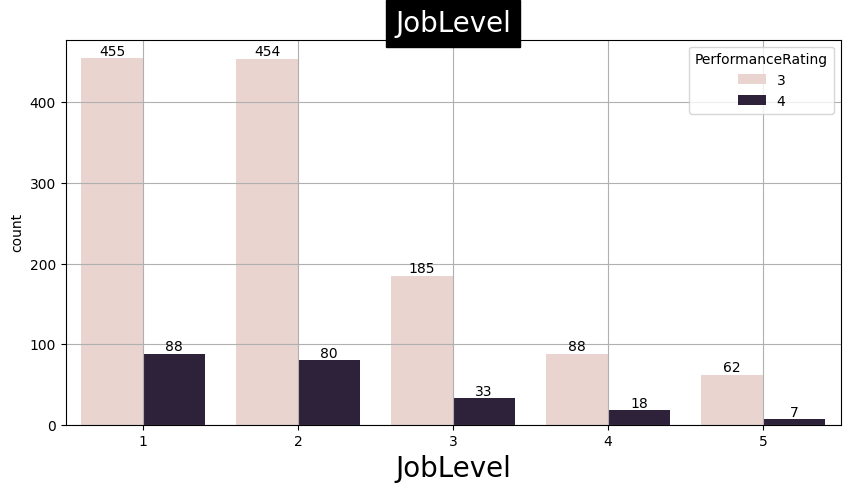

In [ ]:
plt.figure(figsize=(10,5))

ax = sns.countplot(x=df['JobLevel'], data=df,hue="PerformanceRating")
for container in ax.containers:
        ax.bar_label(container)
plt.title('JobLevel',backgroundcolor='black',color='white',fontsize=20)
plt.xlabel('JobLevel',fontsize=20)
plt.grid()
plt.show()

<Figure size 500x1000 with 0 Axes>

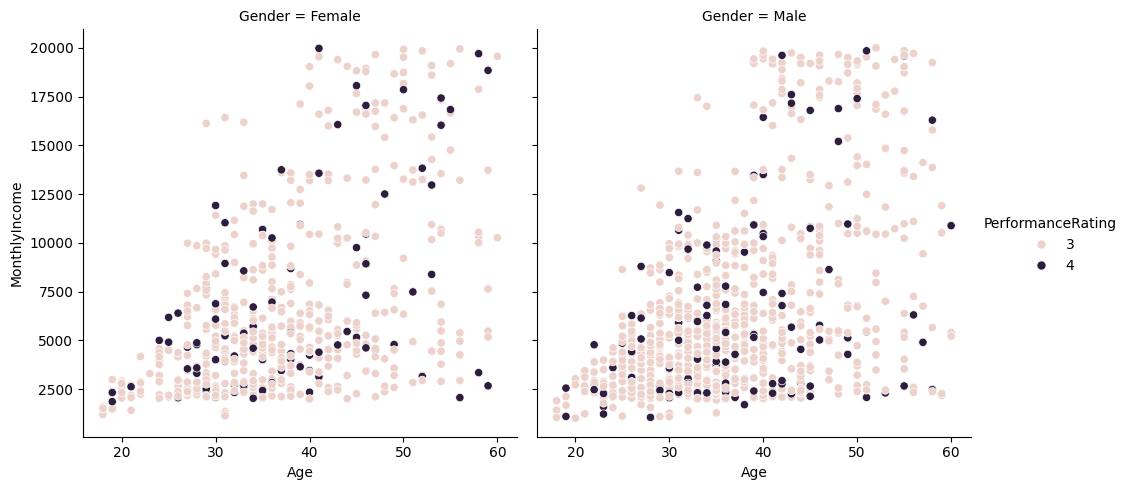

In [ ]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="Age", hue="PerformanceRating",col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

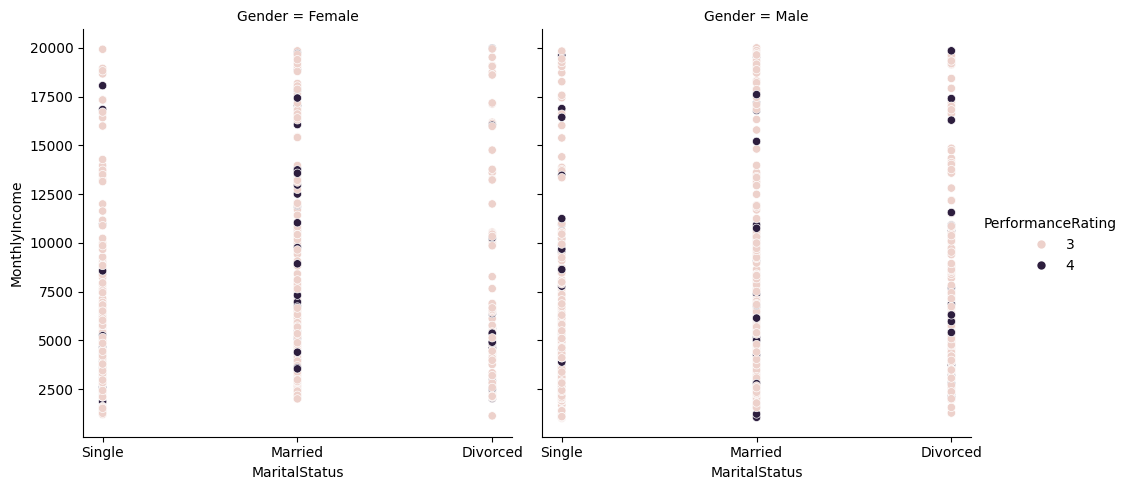

In [ ]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="MaritalStatus", hue="PerformanceRating",col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

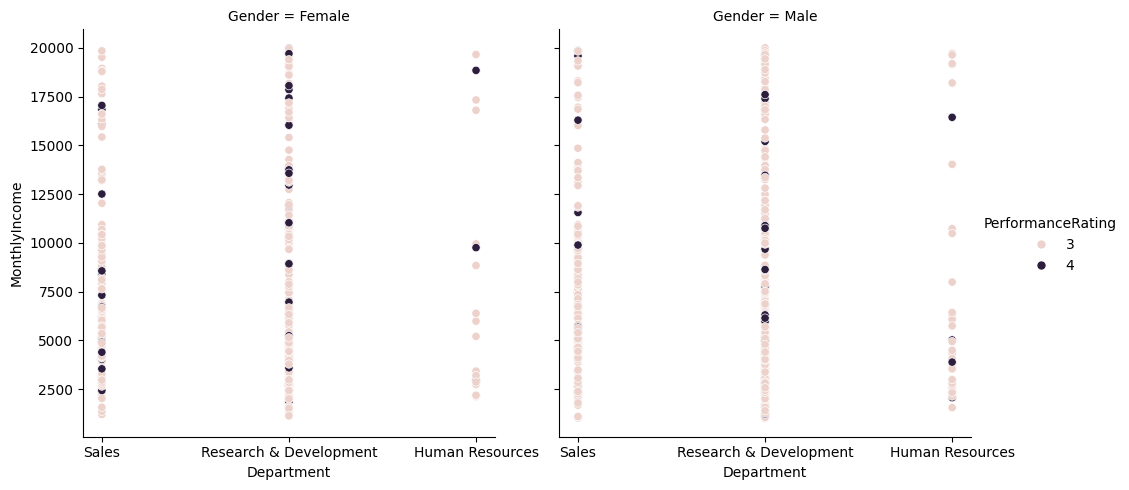

In [ ]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="Department", hue="PerformanceRating",col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

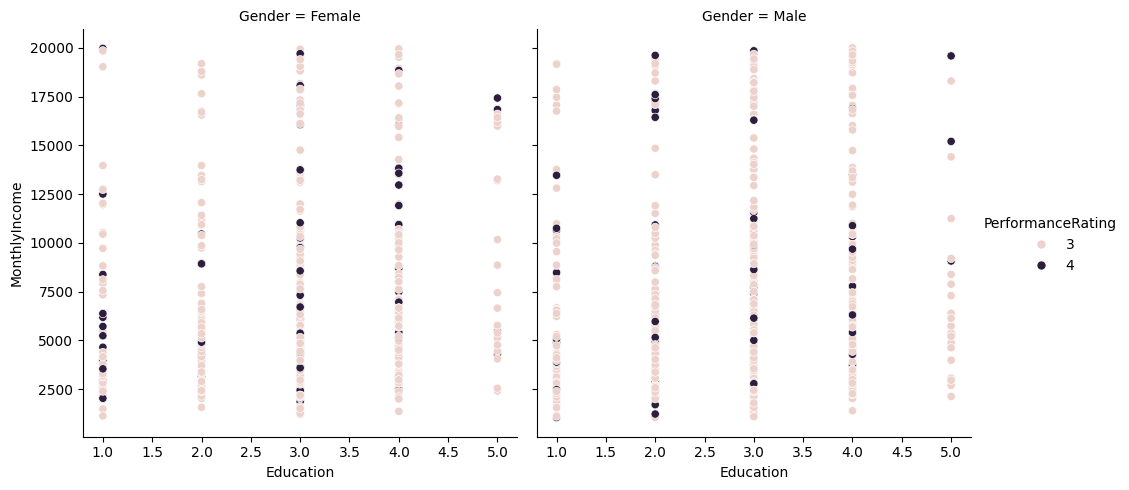

In [ ]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="Education", hue="PerformanceRating",col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

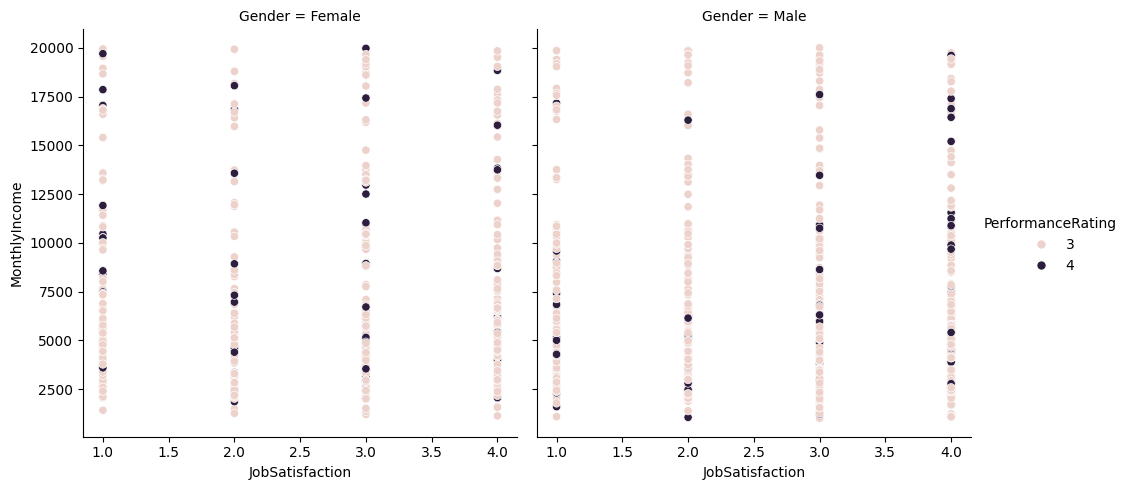

In [ ]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="JobSatisfaction", hue="PerformanceRating",col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

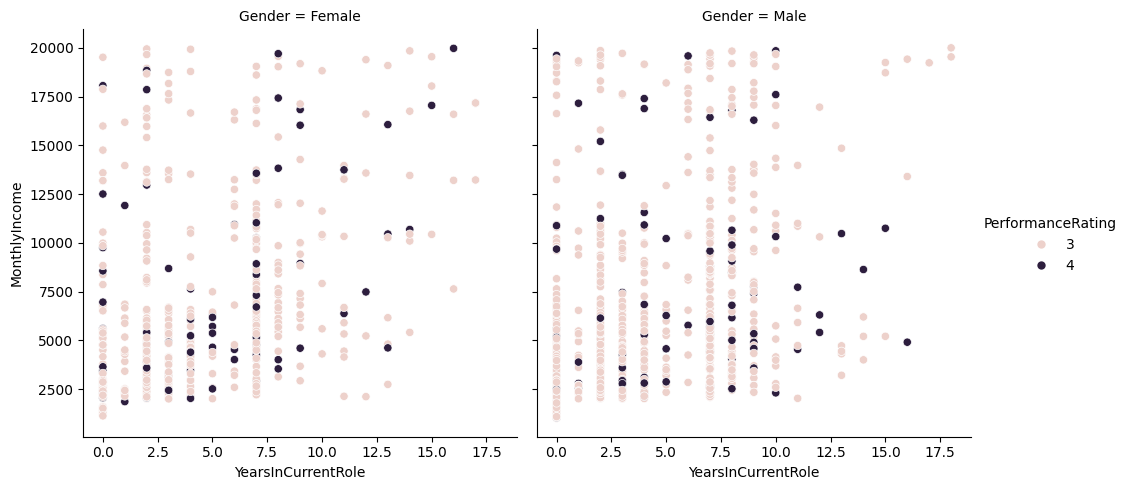

In [ ]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="YearsInCurrentRole", hue="PerformanceRating",col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

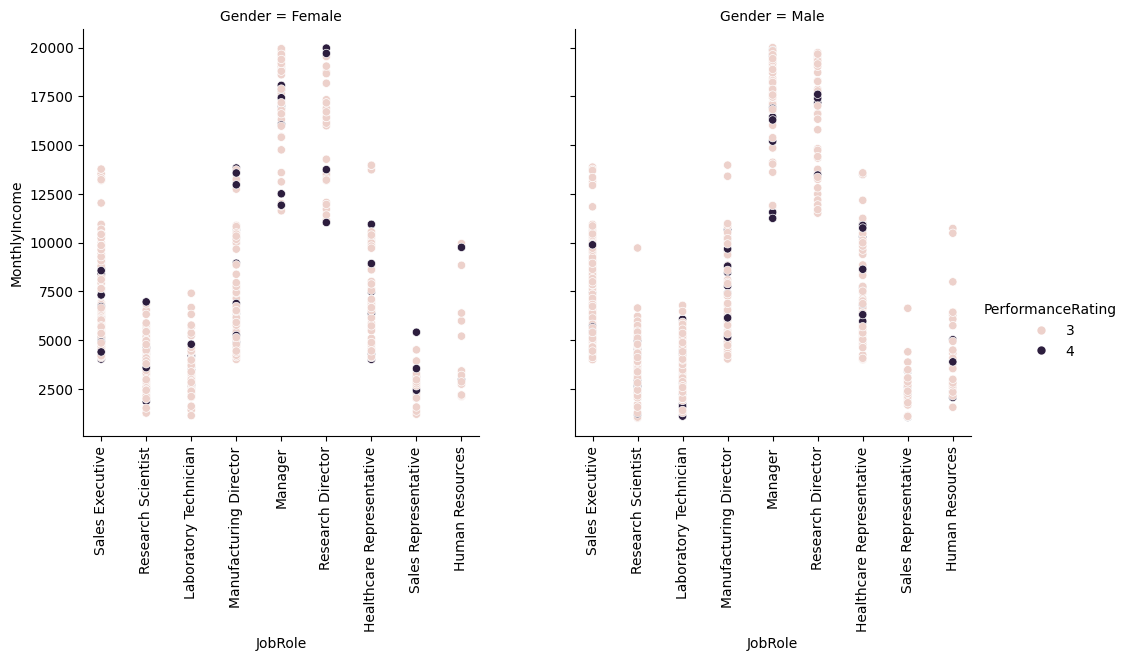

In [ ]:
plt.figure(figsize=(5,10))
ax=sns.relplot(data=df, y="MonthlyIncome", x="JobRole", hue="PerformanceRating",col='Gender')
rotation = 90
for i, ax in enumerate(ax.fig.axes):   ## getting all axes of the fig object
     ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)
#plt.xticks(rotation=90)
plt.show()

**Analysis of graphs**

- Employees with a performance rating of 3 outnumber those with a rating of 4 in every category.  
- Attrition is highest for performance rating‑3 employees and decreases as income rises.  
- Most rare travelers and non‑overtime workers hold a performance rating of 3.  
- Research & Development and Life Sciences/Medical roles are dominated by Performance rating‑3 staff.  
- Married employees and males are more often rated 3.  
- Performance rating‑4 employees tend to earn more on average, though incomes overlap.  
- No clear pattern links rating to age, job satisfaction, or years in current role.

In [ ]:
df_copy = df.copy()

In [ ]:
#convert category attributes with only 2 distinct values to numeric by assigning labels
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df_copy['Attrition']=label_encoder.fit_transform(df['Attrition'])
df_copy['OverTime']=label_encoder.fit_transform(df['OverTime'])
df_copy['Gender']=label_encoder.fit_transform(df['Gender'])

In [ ]:
#convert category attributes with more than 2 distinct values to numeric using one-hot vector
df_copy=pd.get_dummies(df_copy, columns=['BusinessTravel', 'Department', 'EducationField',
                               'JobRole', 'MaritalStatus'])

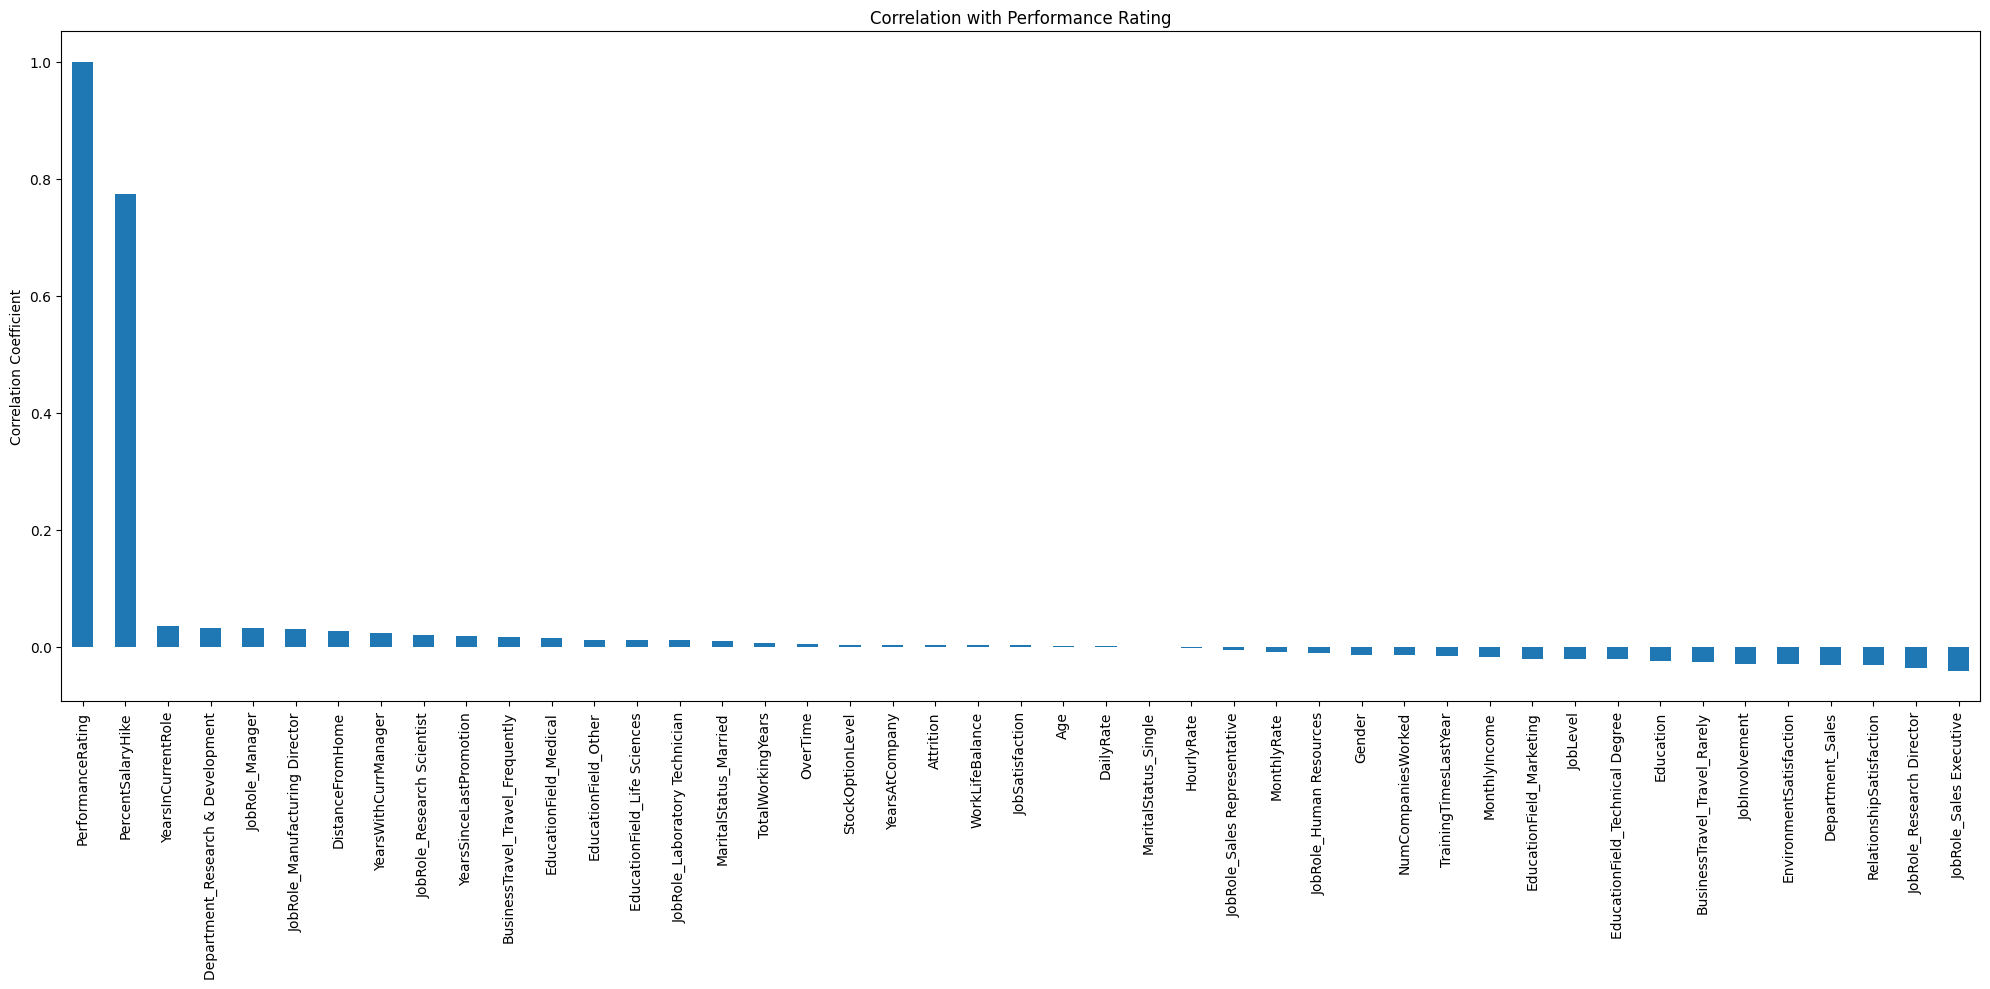

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Start with a fresh copy of the original DataFrame
df_copy = df.copy()

# convert category attributes with only 2 distinct values to numeric by assigning labels
label_encoder = LabelEncoder()
df_copy['Attrition'] = label_encoder.fit_transform(df_copy['Attrition']) # Apply to df_copy
df_copy['OverTime'] = label_encoder.fit_transform(df_copy['OverTime'])   # Apply to df_copy
df_copy['Gender'] = label_encoder.fit_transform(df_copy['Gender'])     # Apply to df_copy

# convert category attributes with more than 2 distinct values to numeric using one-hot vector
df_copy = pd.get_dummies(df_copy, columns=['BusinessTravel', 'Department', 'EducationField',
                               'JobRole', 'MaritalStatus'], drop_first=True) # Apply to df_copy, use drop_first=True to avoid multicollinearity

# Drop the columns that are not useful for correlation analysis and might contain non-numeric data
# Check if columns exist before dropping
cols_to_drop = ['Over18', 'EmployeeNumber','EmployeeCount','StandardHours']
df_copy = df_copy.drop(cols_to_drop, axis=1, errors='ignore')

# Calculate correlations
plt.figure(figsize=(20,10))
correlations = df_copy.corr()

# Plot correlation with Performance Rating
if 'PerformanceRating' in correlations.columns:
    correlations['PerformanceRating'].sort_values(ascending = False).plot(kind='bar');
    plt.title('Correlation with Performance Rating')
    plt.ylabel('Correlation Coefficient')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("Error: 'PerformanceRating' column not found in the correlation matrix.")

                               Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661          0.001686   0.208034   
DailyRate                 0.010661   1.000000          0.004985   0.016806   
DistanceFromHome          0.001686   0.004985          1.000000   0.021042   
Education                 0.208034   0.016806          0.021042   1.000000   
EnvironmentSatisfaction   0.010146   0.018355          0.016075   0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction           0.004892   0.030571          0.003669   0.011296   
MonthlyIncome             0.497855   0.007707          0.017014   0.094961   
MonthlyRate               0.028051   0.032182          0.027473   0.026084   
NumCompaniesWorked        0.299635   0.038153          0.029251 

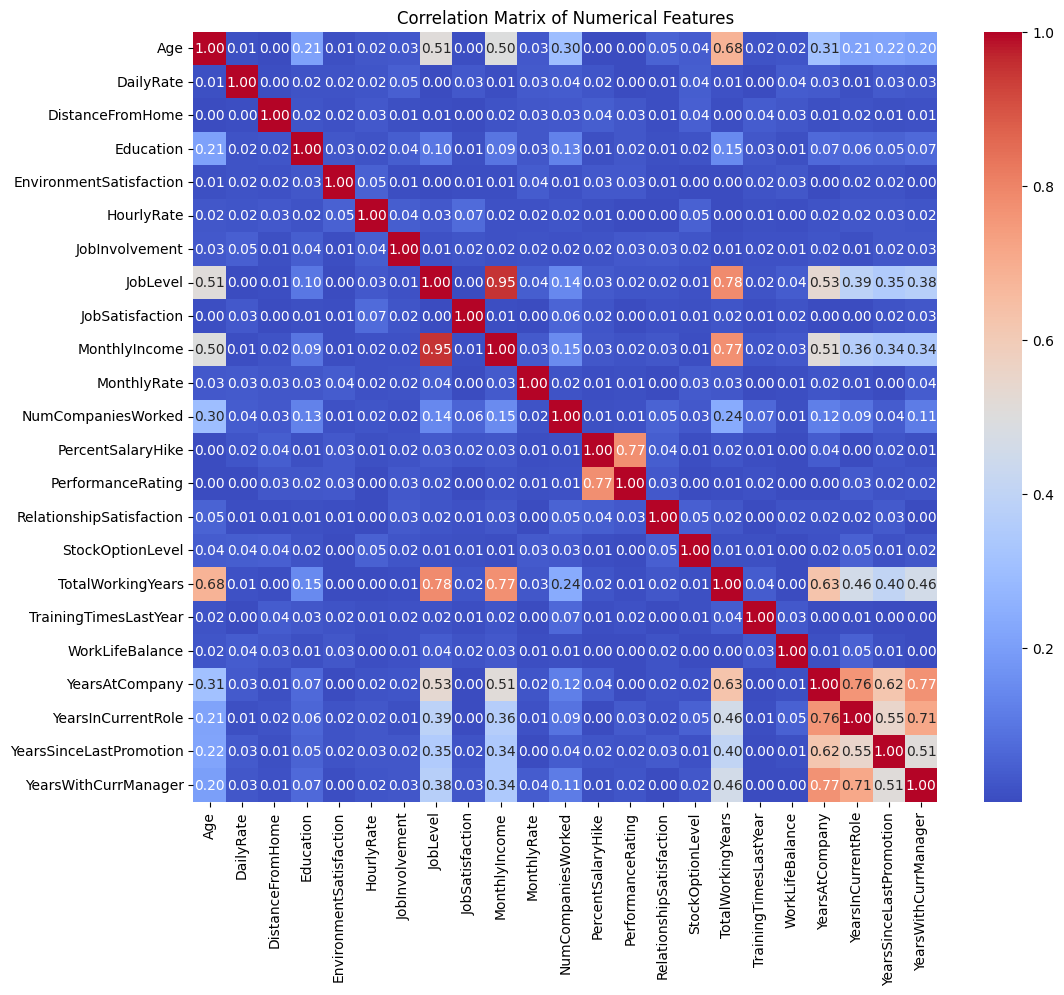

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot
from warnings import filterwarnings

filterwarnings("ignore")

# Make sure to run the cell where 'df2' is created before this one.
# The following line assumes that `df` is already defined and contains your data:
df2 = df.select_dtypes('int64')  # Or wherever you originally defined 'df2'

df2_copy = df2.copy()
# The columns 'EmployeeNumber', 'EmployeeCount', and 'StandardHours'
# might not be present in df2_copy because they were not 'int64' type
# and were excluded when df2 was created.
# Instead of trying to drop them (which causes the KeyError),
# select only the columns you want to keep for the correlation analysis.
# Assuming you want to keep all 'int64' columns except the problematic ones:
columns_to_keep = [col for col in df2_copy.columns
                   if col not in ['EmployeeNumber', 'EmployeeCount', 'StandardHours']]
df2_copy = df2_copy[columns_to_keep]

# Define df1 before using it for correlation analysis
df1 = df.select_dtypes('object') # Similar to how df2 was defined for numerical features

# Calculate the correlation matrix using df2_copy,
# as it's intended for numerical correlations.
correlation_matrix = abs(df2_copy.corr())

# Print the correlation matrix
print(correlation_matrix)

# You can also visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

There are high correlation between some features:

*   monthlyincome & joblevel
*   joblevel , totalworkingyears & monthlyincome
*   performancerating & presentsalaryhike
*   year in currentrol , year at company, year with current manager & year in current role






# **Machine Learning Models**

In [ ]:
DF = df.copy()

In [ ]:
DF['BusinessTravel'] = DF['BusinessTravel'].replace('Travel_Rarely',2)
DF['BusinessTravel'] = DF['BusinessTravel'].replace('Travel_Frequently',3)
DF['BusinessTravel'] = DF['BusinessTravel'].replace('Non-Travel',4)

DF['Attrition'] = DF['Attrition'].replace('Yes',2)
DF['Attrition'] = DF['Attrition'].replace('No',3)

DF['OverTime'] = DF['OverTime'].replace('Yes',2)
DF['OverTime'] = DF['OverTime'].replace('No',3)

DF['Gender'] = DF['Gender'].replace('Male',2)
DF['Gender'] = DF['Gender'].replace('Female',3)

DF['MaritalStatus'] = DF['MaritalStatus'].replace('Single',2)
DF['MaritalStatus'] = DF['MaritalStatus'].replace('Married',3)
DF['MaritalStatus'] = DF['MaritalStatus'].replace('Divorced',4)

DF['Department'] = DF['Department'].replace('Sales',2)
DF['Department'] = DF['Department'].replace('Human Resources',3)
DF['Department'] = DF['Department'].replace('Research & Development',4)

DF['EducationField'] = DF['EducationField'].replace('Life Sciences',2)
DF['EducationField'] = DF['EducationField'].replace('Medical',3)
DF['EducationField'] = DF['EducationField'].replace('Marketing',4)
DF['EducationField'] = DF['EducationField'].replace('Technical Degree',2)
DF['EducationField'] = DF['EducationField'].replace('Human Resources',3)
DF['EducationField'] = DF['EducationField'].replace('Other',4)

DF['JobRole'] = DF['JobRole'].replace('Sales Executive',2)
DF['JobRole'] = DF['JobRole'].replace('Manufacturing Director',3)
DF['JobRole'] = DF['JobRole'].replace('Healthcare Representative',4)
DF['JobRole'] = DF['JobRole'].replace('Manager',2)
DF['JobRole'] = DF['JobRole'].replace('Research Director',3)
DF['JobRole'] = DF['JobRole'].replace('Laboratory Technician',4)
DF['JobRole'] = DF['JobRole'].replace('Sales Representative',2)
DF['JobRole'] = DF['JobRole'].replace('Research Scientist',3)
DF['JobRole'] = DF['JobRole'].replace('Human Resources',4)

In [ ]:
#normalizing
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range = (0,1))

# Drop the 'Over18' column from DF before scaling
# This column contains the string 'Y' and is not needed for normalization
if 'Over18' in DF.columns:
    DF = DF.drop(columns=['Over18'])

DF1 = DF.drop(columns=['PerformanceRating'])
norm = scaler.fit_transform(DF)
norm_df = pd.DataFrame(norm,columns=DF.columns)

In [ ]:
X = pd.DataFrame(norm_df.drop(columns='PerformanceRating'))
Y = pd.DataFrame(norm_df.PerformanceRating).values.reshape(-1, 1)

**Problem: Imbalanced Data Distribution**

In machine learning, imbalanced data occurs when one class has significantly more instances than the others. This often leads to biased models that favor the majority class, resulting in poor performance (especially low recall) for the minority class.


**Solution: SMOTE (Synthetic Minority Oversampling Technique)**

SMOTE addresses this issue by generating synthetic examples for the minority class through interpolation between existing samples and their k-nearest neighbors. This helps balance the dataset, allowing classification models to learn patterns more effectively and reduce bias toward the majority class.




In [ ]:
from sklearn.model_selection import train_test_split

# Assuming your features are in X and your target variable is in y
# Define select_columns here with the columns you want to use
select_columns = ['Attrition', 'BusinessTravel', 'Department',  'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']  # Replace with your desired columns
X = df1[select_columns]
# Access 'PerformanceRating' from the original DataFrame 'df'
y = df['PerformanceRating']  # 'PerformanceRating' is likely in the original 'df'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test

# Now you have X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1029, 8) (441, 8) (1029,) (441,)


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd # Ensure pandas is imported

# Make sure 'norm_df' is created and contains the normalized numerical data
# from the previous steps (specifically cell 45).
# Assuming norm_df has the target variable 'PerformanceRating' and other features.

# Define features (X) and target (y) using the normalized DataFrame
X = norm_df.drop(columns='PerformanceRating')
y = norm_df['PerformanceRating']

# Split the data into training and testing sets
# Use X and y from norm_df which are numerical
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test

# Now you have X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# SMOTE
# Install imbalanced-learn if not already installed
# !pip install imbalanced-learn

oversampler = SMOTE(random_state=0)

# Apply SMOTE to the training data using the numerical X_train and y_train
smote_train, smote_target = oversampler.fit_resample(X_train, y_train)

print("\nShapes after SMOTE:")
print("smote_train shape:", smote_train.shape)
print("smote_target shape:", smote_target.shape)

(1029, 33) (441, 33) (1029,) (441,)

Shapes after SMOTE:
smote_train shape: (1730, 33)
smote_target shape: (1730,)




# **1**.  **Decision Tree**

A Decision Tree is a supervised machine learning algorithm used for both classification and regression tasks. It splits data into branches based on feature values, creating a tree-like structure where each internal node represents a decision based on an attribute, and each leaf node represents an outcome or prediction.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'DF' is your DataFrame from cell 72 with numerical representations
# and you want to use all columns except 'Attrition' as features:
X = DF.drop(columns=['PerformanceRating'])
y = DF['PerformanceRating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=40)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 1.0
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       379
           4       1.00      1.00      1.00        62

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441

Confusion Matrix:
[[379   0]
 [  0  62]]



# **2.   Random Forest**

Random Forest is an ensemble learning method that builds multiple decision trees and combines their outputs for better accuracy. For classification, it predicts the class most selected by the trees. It reduces overfitting common in single decision trees and generally offers higher accuracy.While often more reliable than a single tree, its performance can vary based on the dataset.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters here

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
cm

Accuracy: 1.0
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       379
           4       1.00      1.00      1.00        62

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441

Confusion Matrix:


array([[379,   0],
       [  0,  62]])


# **3.  Support Vector Machine**

SVM is a powerful supervised machine learning algorithm used for classification and regression. It works by finding the optimal boundary (hyperplane) that best separates different classes in the data.
SVM is especially effective in high-dimensional spaces and can handle both linear and non-linear classification using kernel functions.



In [ ]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42) # You can change the kernel (e.g., 'rbf', 'poly')

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")

print(classification_report(y_test, y_pred_svm))

# Confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:")
cm_svm

SVM Accuracy: 0.8594104308390023
              precision    recall  f1-score   support

           3       0.86      1.00      0.92       379
           4       0.00      0.00      0.00        62

    accuracy                           0.86       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.74      0.86      0.79       441

SVM Confusion Matrix:


array([[379,   0],
       [ 62,   0]])